## Compensation Data Analysis - Untransformed Predictions

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.cross_decomposition import PLSRegression

import statsmodels.api as sm

import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.weight"] = "bold"
plt.style.use('ggplot')

In [3]:
comp = pd.read_csv('data/prepped_comp_data_interactions.csv', index_col='entry_id')
comp

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
4,6.359576,5.192962,5.959718,2.197336,0.712125,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.153297,4.787500,-6.907755,3.970311,0.896446,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.247029,4.700489,4.382039,-6.907755,-0.578121,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,5.049862,4.905282,2.079567,2.565026,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.303310,5.056252,3.258135,3.332240,1.080767,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,4.744941,4.744941,-6.907755,-6.907755,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30139,5.913506,5.231114,5.010642,3.496538,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30140,5.356591,5.176155,-6.907755,3.555377,-0.762442,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
RANDOM_STATE = 721
X_train, X_test, _, _ = train_test_split(comp, comp, test_size=0.1, random_state=RANDOM_STATE)

y_total_comp = np.exp(X_train.log_total_comp)
y_salary = np.exp(X_train.log_salary)
y_stock = np.exp(X_train.log_stock)
y_bonus = np.exp(X_train.log_bonus)
X = X_train.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

y_test_total_comp = np.exp(X_test.log_total_comp)
y_test_salary = np.exp(X_test.log_salary)
y_test_stock = np.exp(X_test.log_stock)
y_test_bonus = np.exp(X_test.log_bonus)
X_test = X_test.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

X
X_test

,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
1042,0.343483,0.221278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,-0.393800,0.565848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21860,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7900,-0.209479,0.910418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,-0.393800,0.565848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13550,-0.025158,-0.467863,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,0.527804,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
23789,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11706,0.712125,1.254988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,-0.578121,-0.467863,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,-1.131083,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5982,0.343483,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25710,-0.578121,-0.467863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13958,0.896446,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [5]:
num_features = X.columns.size

alphas = 10**np.linspace(10,-2,100)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def ridge(X, y):
    ridgecv = skl_lm.RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
    ridgecv.fit(X, y)

    optimal_ridge = skl_lm.Ridge()
    optimal_ridge.set_params(alpha=ridgecv.alpha_)
    optimal_ridge.fit(X, y)

    coefs = pd.Series(optimal_ridge.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_ridge.predict(X)))
    
    return {
        'alpha': ridgecv.alpha_,
        'model_type': 'ridge',
        'model': optimal_ridge,
        'intercept': optimal_ridge.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def lasso(X, y):
    lassocv = skl_lm.LassoCV(alphas = alphas, cv=kf, max_iter=10000)
    lassocv.fit(X, y)

    optimal_lasso = skl_lm.Lasso()
    optimal_lasso.set_params(alpha = lassocv.alpha_)
    optimal_lasso.fit(X, y)

    coefs = pd.Series(optimal_lasso.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_lasso.predict(X)))
    
    return {
        'alpha': lassocv.alpha_,
        'model_type': 'lasso',
        'model': optimal_lasso,
        'intercept': optimal_lasso.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def pls(X, y):
    regr = skl_lm.LinearRegression()
    num_components = 7 # num_features
    mse = []
    for i in np.arange(1, num_components):
        pls=PLSRegression(n_components=i)
        score = -1*cross_val_score(pls, X.iloc[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_components))
    min_component = np.argmin(mse_per_component) + 1

    pls = PLSRegression(n_components=min_component, scale=False)
    pls.fit(X, y)

    coefs = pd.Series(pls.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, pls.predict(X)))
    
    return {
        'model_type': 'pls',
        'model': pls,
        'intercept': None,
        'coefs': coefs,
        'rmse': rmse,
        'min_component': min_component }

def get_model_type_min_mse(models):
    min_model_type = None
    for index, (model_type, model) in enumerate(models.items()):            
        if index == 0 or model['rmse'] < models[min_model_type]['rmse']:
            min_model_type = model_type
    return min_model_type

def perform_model_selection(X, y, identifier):
    models = {
        'ridge': ridge(X, y),
        'lasso': lasso(X, y),
        'pls': pls(X, y),
    }
    
    print(f'Performing model selection on {identifier}.')
    for model_type in models:
        print(f'{model_type} RMSE:\t', models[model_type]['rmse'])

    best_model_type = get_model_type_min_mse(models)
    best_model = models[best_model_type]
    print(f'Best model is {best_model_type}.')
    
    print('\nIntercept:\t\t', best_model['intercept'], '\n')
    print(best_model['coefs'])
    
    return best_model, models

## Salary Model Selection

In [6]:
best_model_salary, all_models_salary = perform_model_selection(X, y_salary, 'salary')

Performing model selection on salary.
ridge RMSE:	 22.499139992557215
lasso RMSE:	 23.378233143858502
pls RMSE:	 27.767391665618558
Best model is ridge.

Intercept:		 94.06305270179655 

scaled_years_experience                  14.257096
scaled_years_company                      0.199930
company[AT&T]                           -18.046669
company[Accenture]                      -31.057716
company[Adobe]                           -3.155002
                                           ...    
company_location[Yelp_SF Bay Area]       -0.240539
company_location[Zillow_SF Bay Area]      5.136890
company_location[Zillow_Seattle Area]     8.009172
company_location[eBay_SF Bay Area]      -10.492502
company_location[eBay_Seattle Area]      -2.987132
Length: 615, dtype: float64


## Stock Model Selection

In [7]:
best_model_stock, all_models_stock = perform_model_selection(X, y_stock, 'stock')

Performing model selection on stock.
ridge RMSE:	 56.6181160761949
lasso RMSE:	 56.58476522928578
pls RMSE:	 65.9700497423786
Best model is lasso.

Intercept:		 10.10589764059629 

scaled_years_experience                  14.154793
scaled_years_company                      5.094657
company[AT&T]                           -19.968207
company[Accenture]                       -5.113799
company[Adobe]                           21.344674
                                           ...    
company_location[Yelp_SF Bay Area]        0.000000
company_location[Zillow_SF Bay Area]     -0.000000
company_location[Zillow_Seattle Area]     5.791452
company_location[eBay_SF Bay Area]       -5.390893
company_location[eBay_Seattle Area]      -0.000000
Length: 615, dtype: float64


## Bonus Model Selection

In [8]:
best_model_bonus, all_models_bonus = perform_model_selection(X, y_bonus, 'bonus')

Performing model selection on bonus.
ridge RMSE:	 20.936557637406384
lasso RMSE:	 21.362215674295054
pls RMSE:	 22.610229680018602
Best model is ridge.

Intercept:		 9.571775845509585 

scaled_years_experience                  4.817262
scaled_years_company                    -1.351627
company[AT&T]                            3.572023
company[Accenture]                      -0.842983
company[Adobe]                          -3.211061
                                           ...   
company_location[Yelp_SF Bay Area]      -2.468302
company_location[Zillow_SF Bay Area]    -0.379232
company_location[Zillow_Seattle Area]    5.015356
company_location[eBay_SF Bay Area]       1.157037
company_location[eBay_Seattle Area]     -1.635017
Length: 615, dtype: float64


## Suggested Negotiation Values

In [9]:
def get_prediction_range(best_model, X_test, y_test):
    y_pred_rmse = best_model['rmse']
    
    y_pred = best_model['model'].predict(X_test).flatten()
    y_pred_lower_bound = y_pred - y_pred_rmse
    y_pred_upper_bound = y_pred + y_pred_rmse
    
    y_pred[y_pred < 0] = 0
    y_pred_lower_bound[y_pred_lower_bound < 0] = 0
    y_pred_upper_bound[y_pred_upper_bound < 0] = 0

    test_error = np.sqrt(mean_squared_error(y_test, y_pred))
    print(test_error)

    y_pred_range = pd.DataFrame(data={
        'pred_lower_bound': y_pred_lower_bound,
        'pred': y_pred,
        'pred_upper_bound': y_pred_upper_bound,
    }, index=X_test.index)
    
    return y_pred_range

In [10]:
y_pred_salary_range = get_prediction_range(best_model_salary, X_test, y_test_salary)
y_pred_salary_range

23.465671335711075


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,117.330781,139.829921,162.329061
11706,118.240450,140.739590,163.238730
310,154.535617,177.034757,199.533896
815,113.585364,136.084504,158.583644
5982,144.402423,166.901563,189.400703
...,...,...,...
25211,84.321939,106.821079,129.320219
25710,114.941508,137.440648,159.939788
13958,163.873862,186.373002,208.872142


In [11]:
y_pred_stock_range = get_prediction_range(best_model_stock, X_test, y_test_stock)
y_pred_stock_range

59.07244897834982


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,20.919906,77.504672,134.089437
11706,0.000000,52.553202,109.137968
310,54.248508,110.833273,167.418038
815,0.000000,41.750874,98.335639
5982,26.521446,83.106211,139.690976
...,...,...,...
25211,0.000000,0.000000,55.283087
25710,0.000000,9.105610,65.690376
13958,65.414910,121.999676,178.584441


In [12]:
y_pred_bonus_range = get_prediction_range(best_model_bonus, X_test, y_test_bonus)
y_pred_bonus_range

20.911059084174163


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,0.000000,7.538741,28.475299
11706,0.000000,20.709785,41.646343
310,4.262104,25.198662,46.135220
815,0.000000,20.021142,40.957699
5982,0.000000,19.805829,40.742387
...,...,...,...
25211,0.000000,9.728751,30.665309
25710,0.000000,20.245988,41.182546
13958,17.099975,38.036533,58.973090


In [13]:
y_pred_total_comp_sum_range = y_pred_salary_range + y_pred_stock_range + y_pred_bonus_range
np.sqrt(mean_squared_error(y_test_total_comp, y_pred_total_comp_sum_range.pred))
y_pred_total_comp_sum_range

77.57522113075068

,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,138.250687,224.873334,324.893797
11706,118.240450,214.002577,314.023040
310,213.046229,313.066692,413.087155
815,113.585364,197.856520,297.876983
5982,170.923869,269.813603,369.834066
...,...,...,...
25211,84.321939,116.549830,215.268615
25710,114.941508,166.792247,266.812709
13958,246.388748,346.409211,446.429674


In [14]:
best_model_salary['alpha']
best_model_stock['alpha']
best_model_bonus['alpha']

0.8697490026177834

0.01

2.009233002565046

## Analysis

In [15]:
def plot_coefs(coefs, condition = None):
    if condition is None:
        coefs_filtered = coefs
    else:
        coefs_filtered = coefs[condition]
        
    coefs_filtered = coefs_filtered.sort_values()
    plt.bar(coefs_filtered.index, coefs_filtered)
    plt.xticks(rotation=90)
    plt.ylabel('Regression Coefficient ($ in thousands)')
    
coefs_salary = best_model_salary['coefs']
coefs_stock = best_model_stock['coefs']
coefs_bonus = best_model_bonus['coefs']

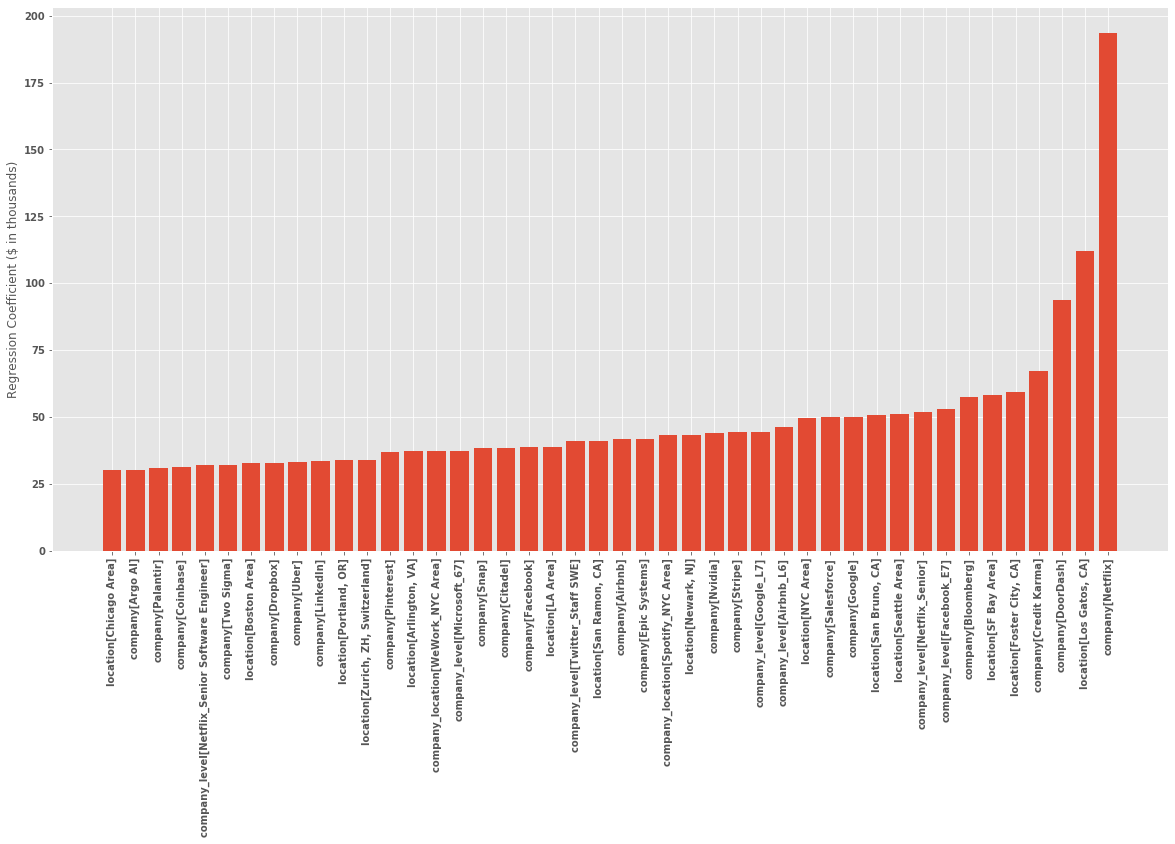

In [16]:
plot_coefs(coefs_salary, coefs_salary > 30)

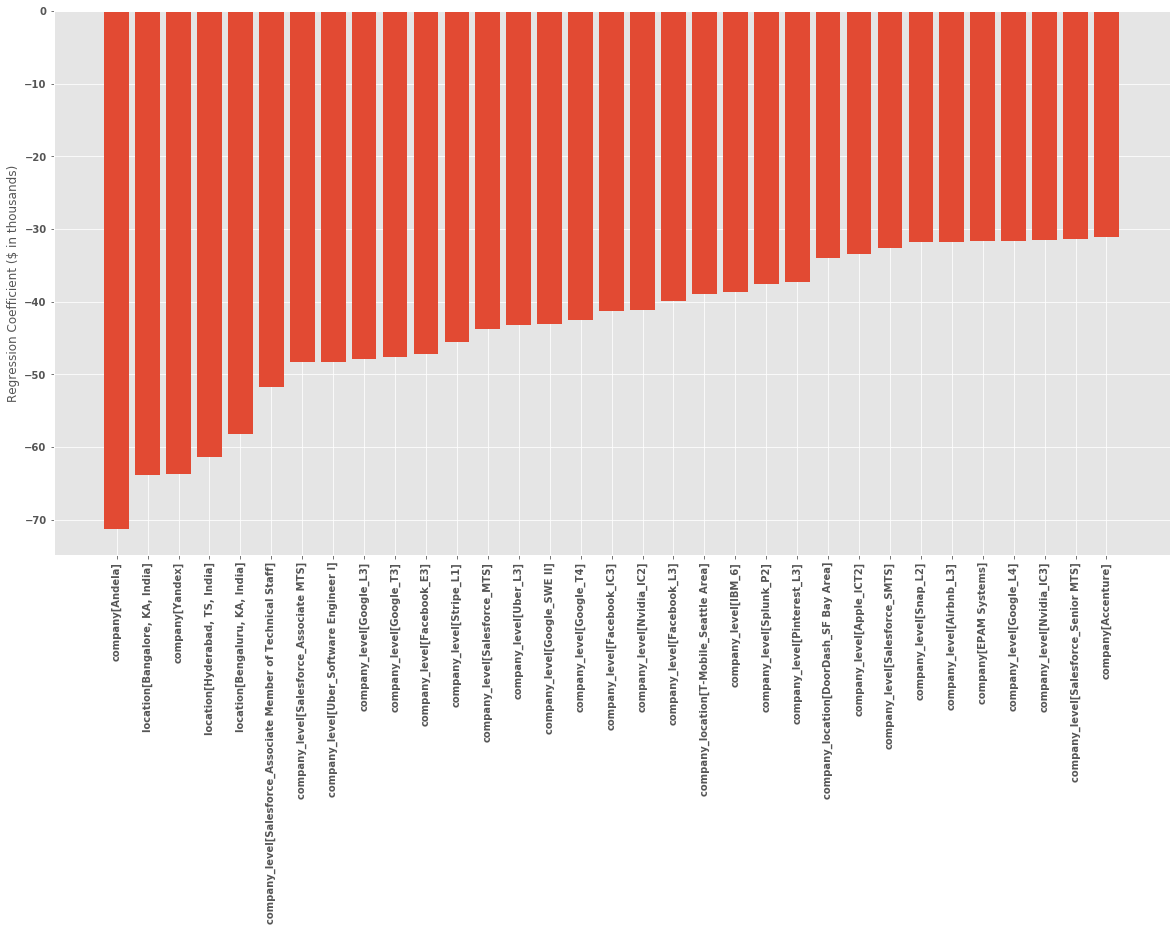

In [17]:
plot_coefs(coefs_salary, coefs_salary < -30)

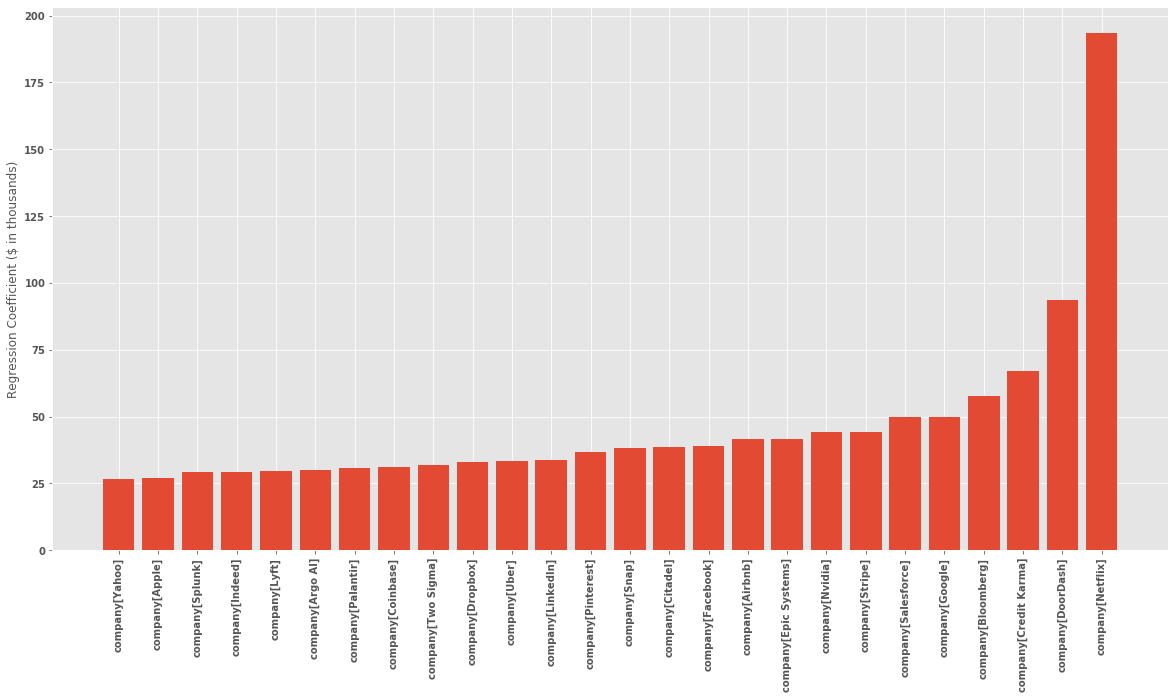

In [18]:
coefs_company = coefs_salary.filter(like='company[')
plot_coefs(coefs_company, coefs_company > 25)

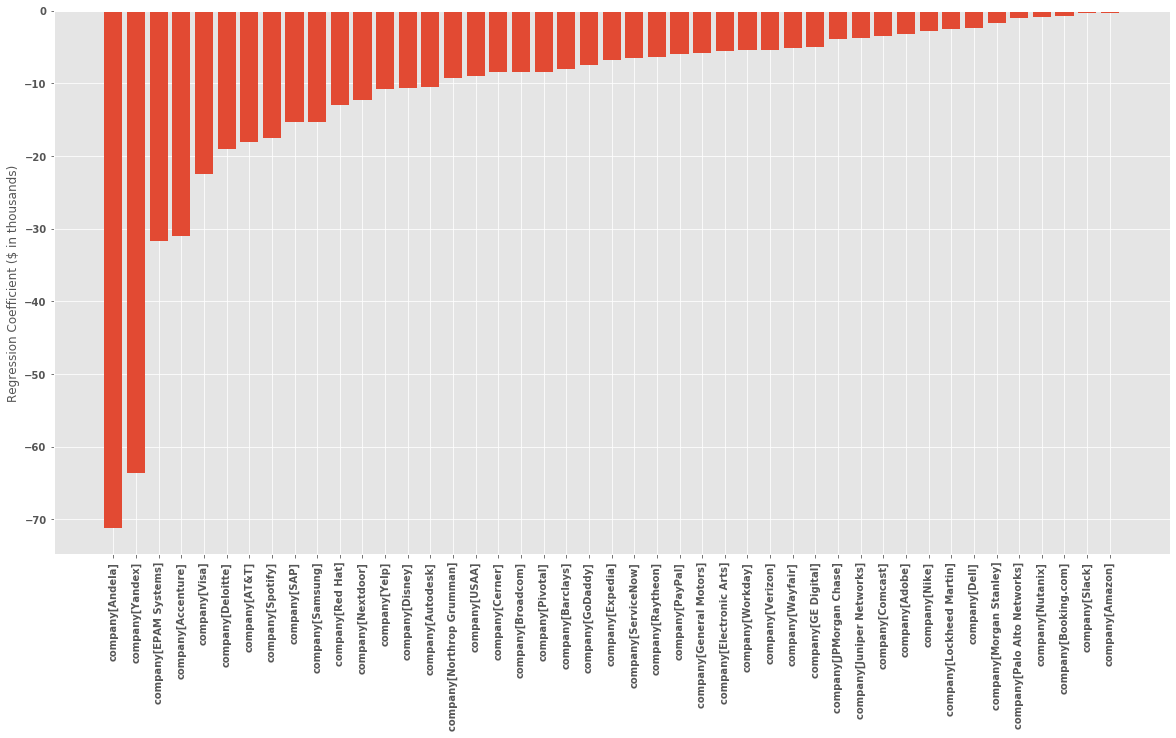

In [19]:
plot_coefs(coefs_company, coefs_company < 0)

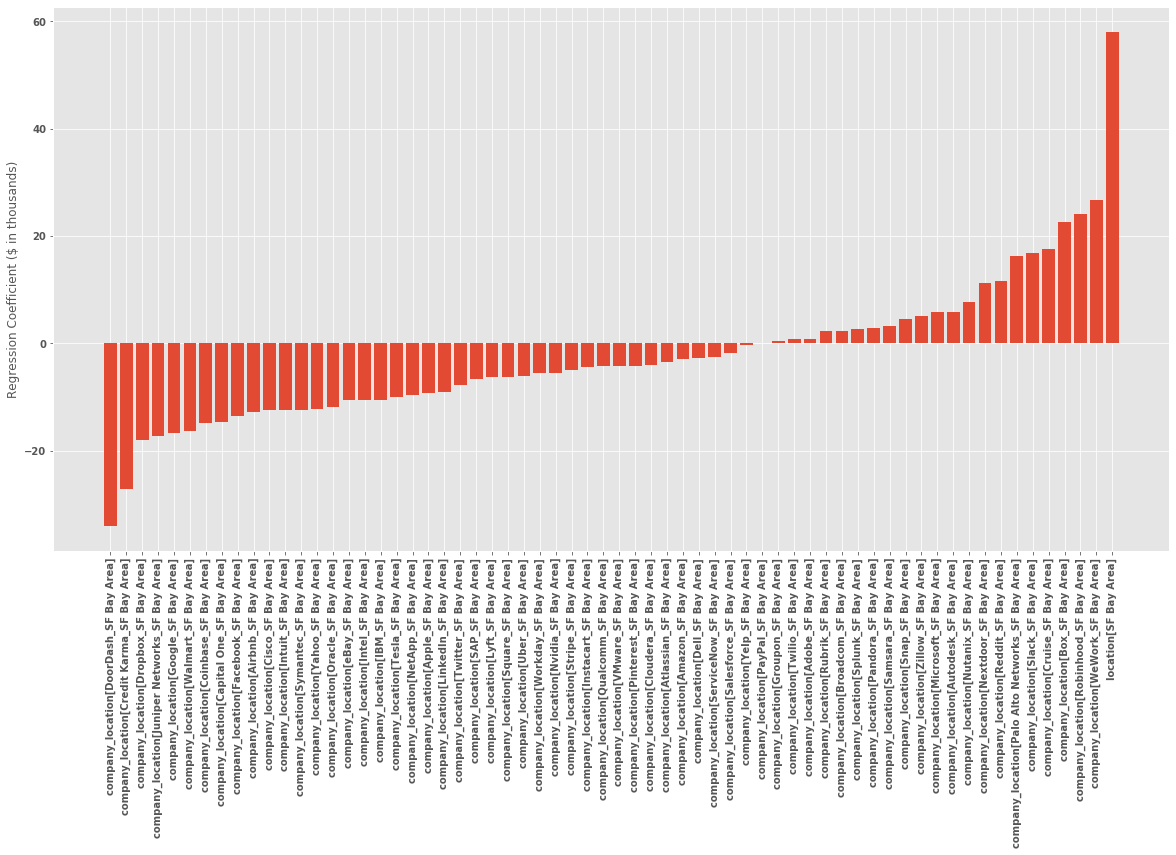

In [20]:
plot_coefs(coefs_salary.filter(like='SF'))

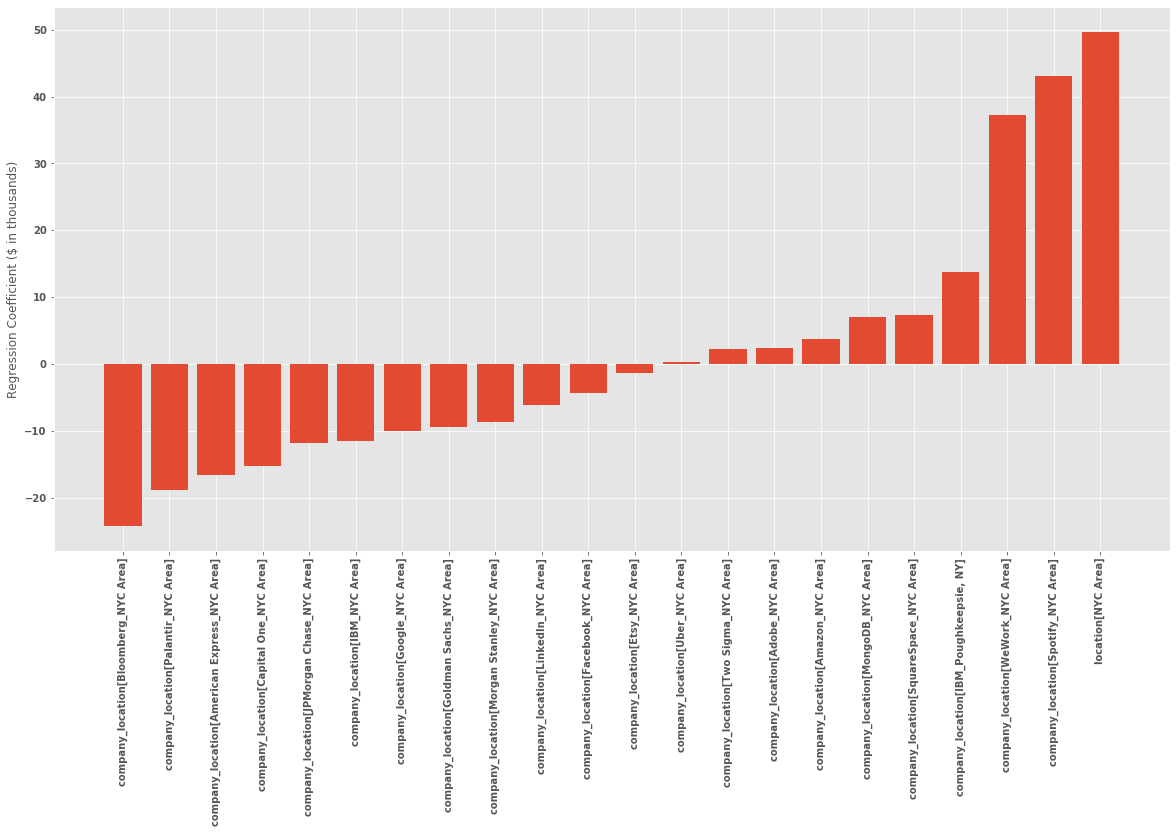

In [21]:
plot_coefs(coefs_salary.filter(like='NY'))

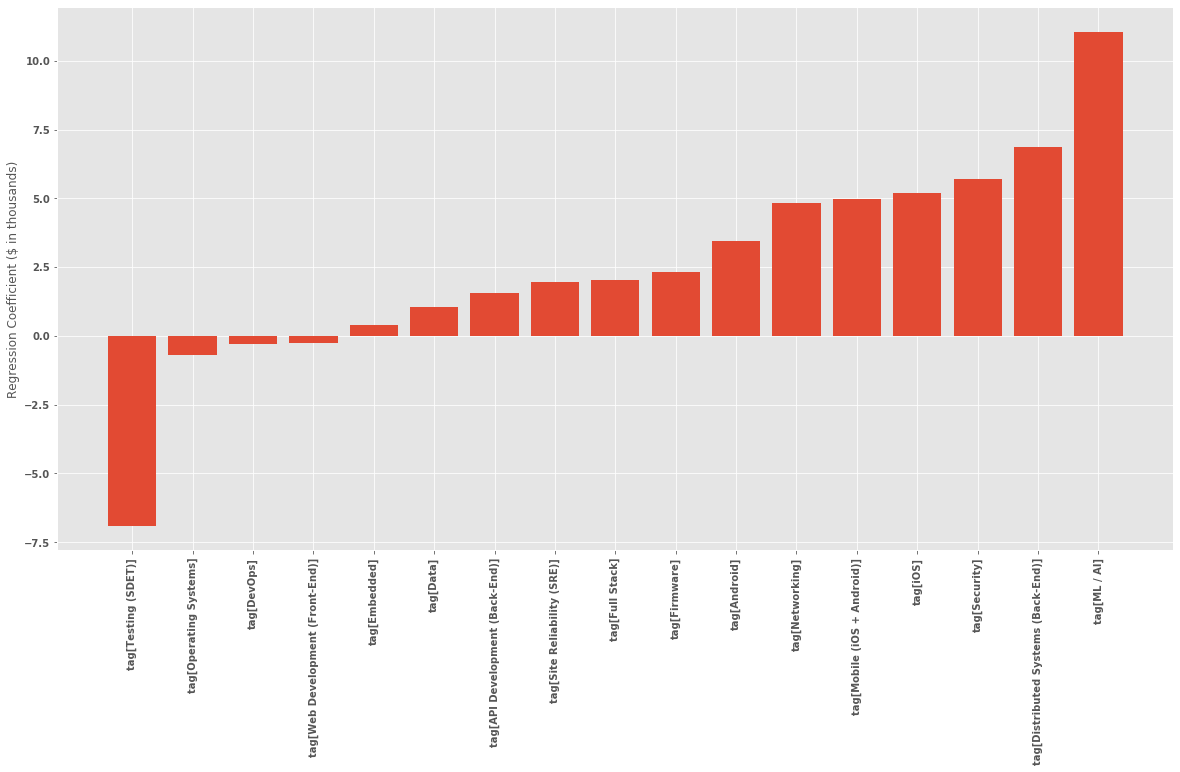

In [22]:
plot_coefs(coefs_salary.filter(like='tag['))

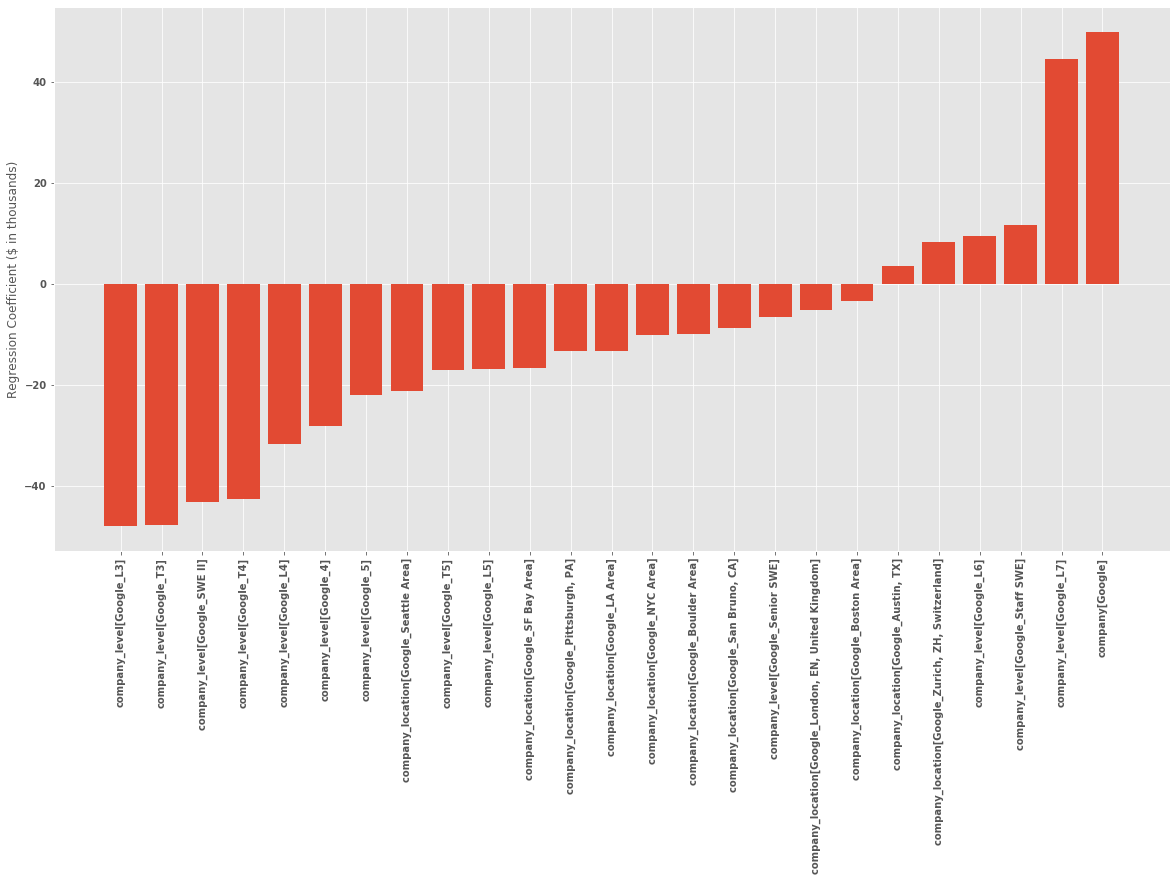

In [23]:
plot_coefs(coefs_salary.filter(like='Google'))

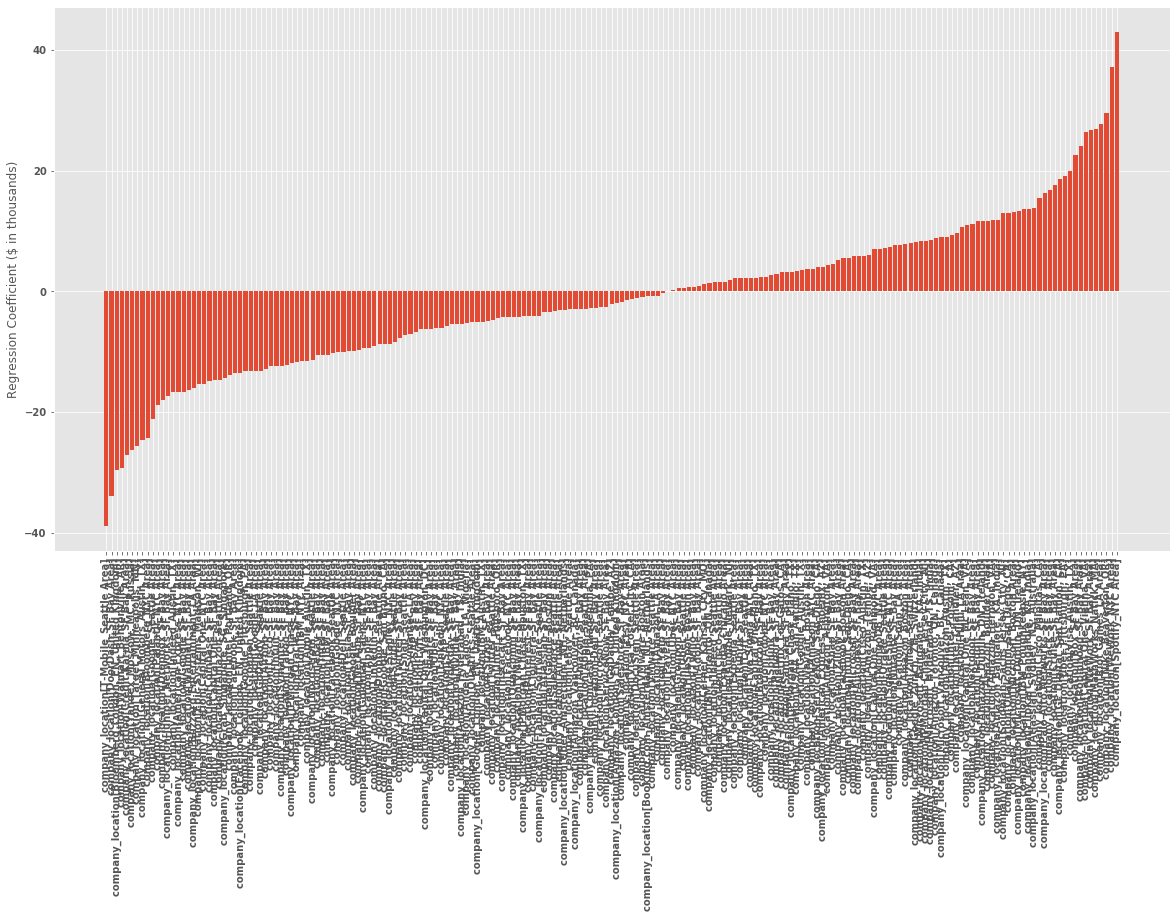

In [24]:
plot_coefs(coefs_salary.filter(like='company_location['))

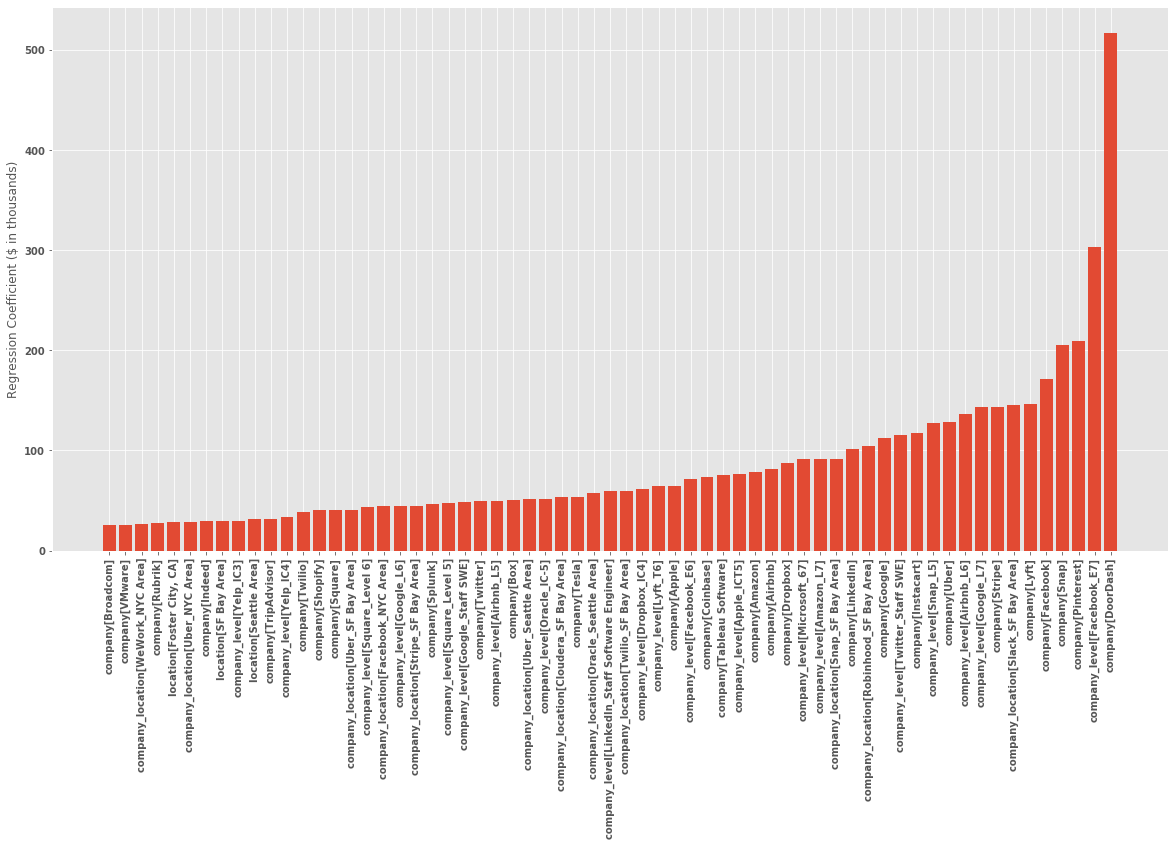

In [25]:
plot_coefs(coefs_stock, coefs_stock > 25)

In [26]:
plot_coefs(coefs_stock, coefs_stocks < -25)

NameError: name 'coefs_stocks' is not defined

In [ ]:
plot_coefs(coefs_stock.filter(like='Google'))

In [ ]:
plot_coefs(coefs_stock.filter(like='Facebook'))